In [1]:
import gnss_lib_py as glp

In [2]:
navdata = glp.SmartLocRaw(input_path="smartloc.csv")

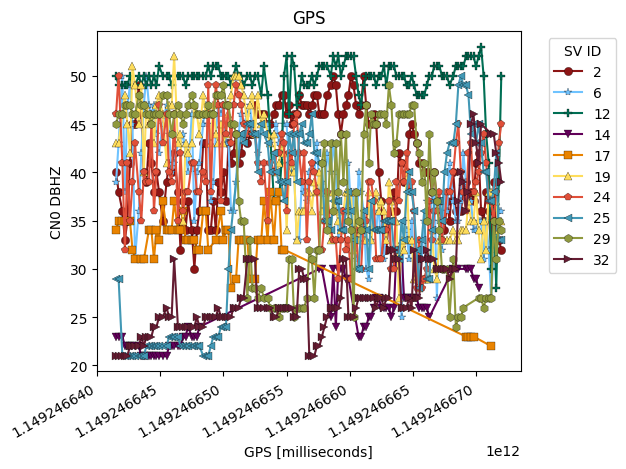

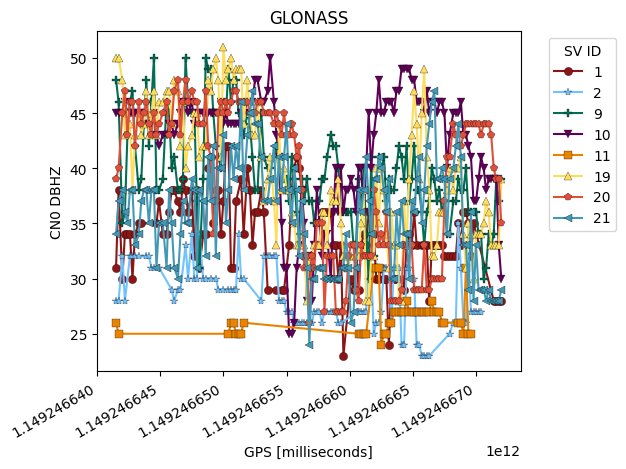

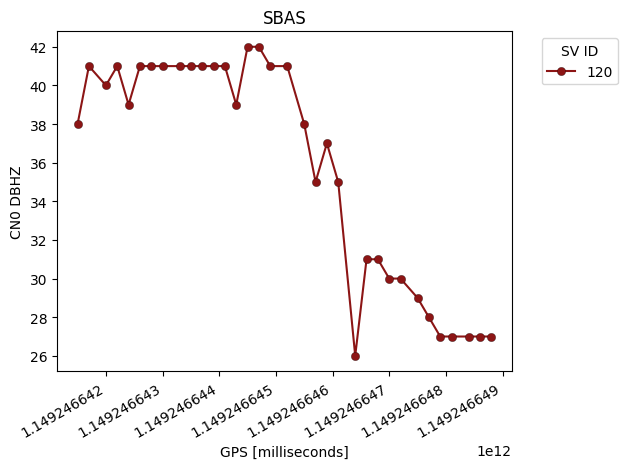

In [3]:
figs = glp.plot_metric_by_constellation(navdata,"gps_millis","cn0_dbhz")

In [4]:
navdata = glp.add_sv_states(navdata,verbose=True)

ephemeris dates needed: [datetime.date(2016, 6, 6)]
using previously downloaded file:
 /home/derek/gnss_lib_py/notebooks/data/ephemeris/sp3/gbm19001.sp3
ephemeris dates needed: [datetime.date(2016, 6, 6)]
using previously downloaded file:
 /home/derek/gnss_lib_py/notebooks/data/ephemeris/clk/gbm19001.clk
interpolating sp3 for  G02
interpolating sp3 for  G06
interpolating sp3 for  G12
interpolating sp3 for  G14
interpolating sp3 for  G17
interpolating sp3 for  G19
interpolating sp3 for  G24
interpolating sp3 for  G25
interpolating sp3 for  G29
interpolating sp3 for  G32
interpolating sp3 for  R01
interpolating sp3 for  R02
interpolating sp3 for  R09
interpolating sp3 for  R10
interpolating sp3 for  R11
interpolating sp3 for  R19
interpolating sp3 for  R20
interpolating sp3 for  R21
interpolating sp3 for  S120
interpolating clk for  G02
interpolating clk for  G06
interpolating clk for  G12
interpolating clk for  G14
interpolating clk for  G17
interpolating clk for  G19
interpolating clk 

In [5]:
# add corrected pseudorange
navdata["corr_pr_m"] = navdata["raw_pr_m"] + navdata["b_sv_m"]

In [6]:
navdata = glp.solve_fde(navdata, method="edm", threshold=0.58)
navdata["fault_edm",:10]

array([0, 1, 1, 0, 1, 1, 0, 0, 0, 1])

In [7]:
navdata = glp.solve_fde(navdata, method="residual", threshold=38)
navdata["fault_edm",:10]

array([0, 1, 1, 0, 1, 1, 0, 0, 0, 1])